# 데이터 가져오기
* 데이터 columns 정보
1. id: unique id for each row
2. Gender: sex - male or female
3. Age: age
4. Height: height
5. Weight: weight
6. family_history_with_overweight: Has a family member suffered or suffers from 7. overweight? - yes or no
8. FAVC: Frequent consumption of high caloric food - yes or no
9. FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always
10. NCP: Number of main meals - 1, 2, 3, 4
11. CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always
12. SMOKE: Do you smoke - yes o no
13. CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l
14. SCC: Calories consumption monitoring - yes or no
15. FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5
16. TUE: Time using technology devices - 0 to 2, 3 to 5, >5
17. CALC: Consumption of alcohol - no, sometimes, frequently, always
18. MTRANS: Transportation used - automobile, motorbike, bike, 19. public_transportation, walking
20. NObeyesdad: Type of obesity - insufficient_weight, normal_weight, 21. overweight-level_i, overweight-level_ii, obesity_type_i, obesity_type_ii, obesity_type_iii
21. BMI: Body mass index

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("ObesityDataSet_cleaned_and_data_sinthetic.csv")
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.620000,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.520000,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.800000,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.800000,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.780000,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,"2,107",female,21,1.710730,131,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,public_transportation,obesity_type_iii,44.901475
2107,"2,108",female,22,1.748584,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.741923
2108,"2,109",female,23,1.752206,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.543817
2109,"2,110",female,24,1.739450,133,yes,yes,always,3,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,44.071535


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

In [56]:
# FAVC: Frequent consumption of high caloric food - yes or no
# FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always
# FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5
# NCP: Number of main meals - 1, 2, 3, 4
obesity = pd.DataFrame(data = data, columns = ["AGE", "Height", "Weight", "FAVC", "FCVC", "NCP", "FAF", "BMI"])
obesity.head()

,AGE,Height,Weight,FAVC,FCVC,NCP,FAF,BMI
0,NaN,1.62,64,no,sometimes,3,0,24.386526
1,NaN,1.52,56,no,always,3,4 to 5,24.238227
2,NaN,1.80,77,no,sometimes,3,2 to 4,23.765432
3,NaN,1.80,87,no,always,3,2 to 4,26.851852
4,NaN,1.78,90,no,sometimes,1,0,28.342381


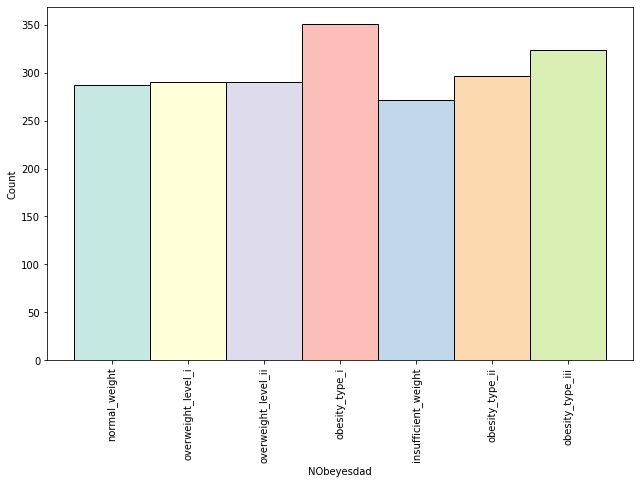

In [30]:
# 비만 타입 개수
sns.histplot(data=data, x="NObeyesdad",hue="NObeyesdad",palette="Set3", legend= False)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

# 높은 칼로리의 음식 섭취와 비만도 사이의 상관 관계 확인하기

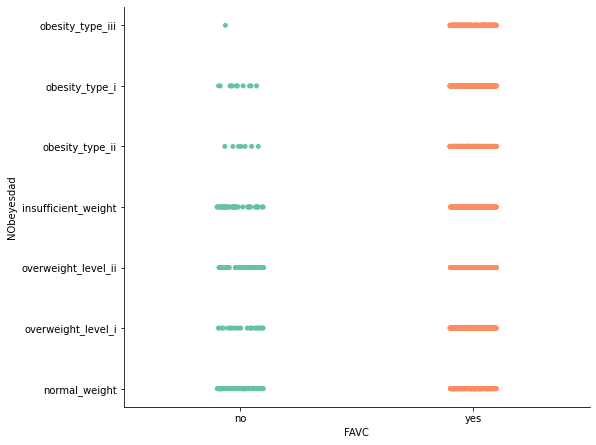

In [31]:
sns.catplot(data=data, y="NObeyesdad",x="FAVC", palette="Set2", legend= False)
# plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

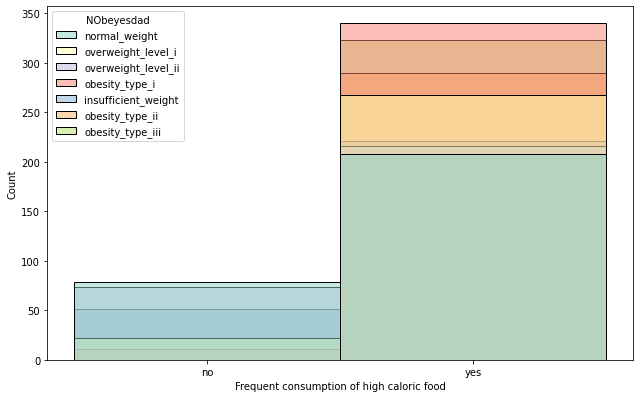

In [38]:
ax = sns.histplot(data=data, x="FAVC", hue="NObeyesdad", palette="Set3", legend= True)
ax.set(xlabel = "Frequent consumption of high caloric food")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

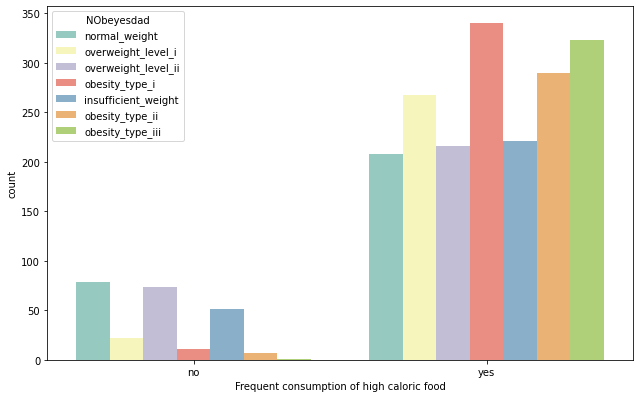

In [66]:
ax = sns.countplot(data=data, x="FAVC", hue="NObeyesdad", palette="Set3")
ax.set(xlabel = "Frequent consumption of high caloric food")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

높은 칼로리 음식 섭취를 하면 비만일 확률이 높다.

# 채소 섭취와 비만도 사이의 상관 관계 확인하기

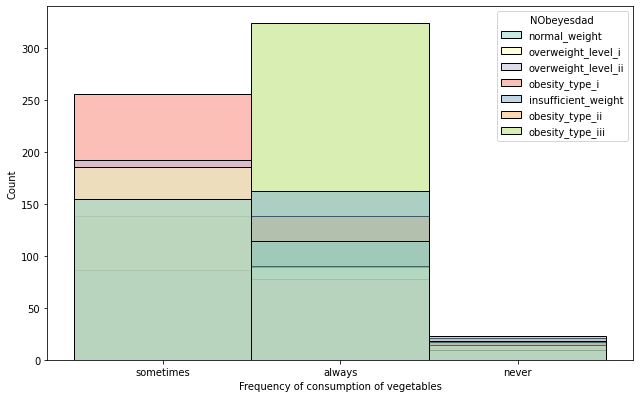

In [40]:
ax = sns.histplot(data=data, x="FCVC", hue="NObeyesdad", palette="Set3", legend= True)
ax.set(xlabel = "Frequency of consumption of vegetables")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

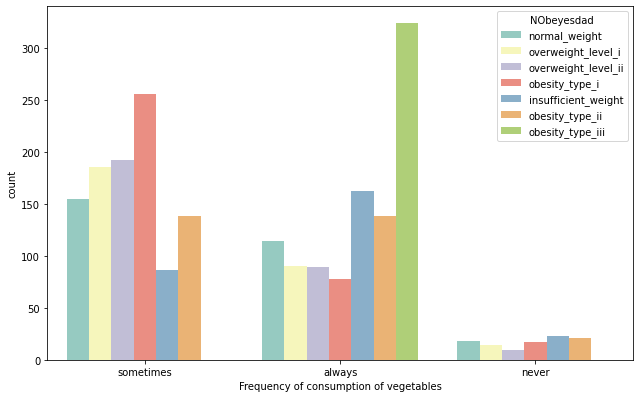

In [54]:
ax = sns.countplot(data=data, x="FCVC", hue="NObeyesdad", palette="Set3")
ax.set(xlabel = "Frequency of consumption of vegetables")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

## BMI 지수
- 정상 체중 18.5~24.9
- 과체중 25~29.9
- 가벼운 비만 30~34.9
- 비만 30이상

# BMI 지수와 채소 섭취 사이의 상관관계

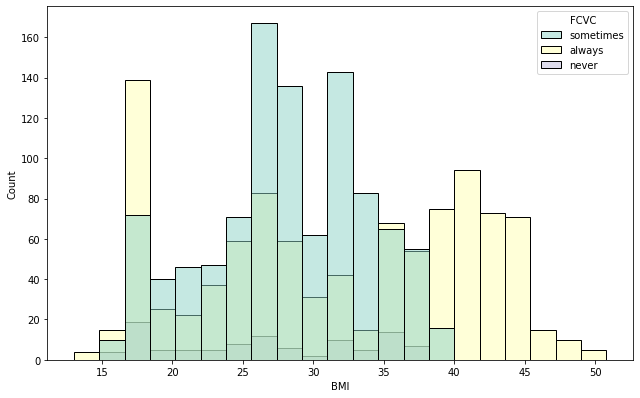

In [42]:
ax = sns.histplot(data=data, x="BMI", hue="FCVC", palette="Set3", legend= True)
ax.set(xlabel = "BMI")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

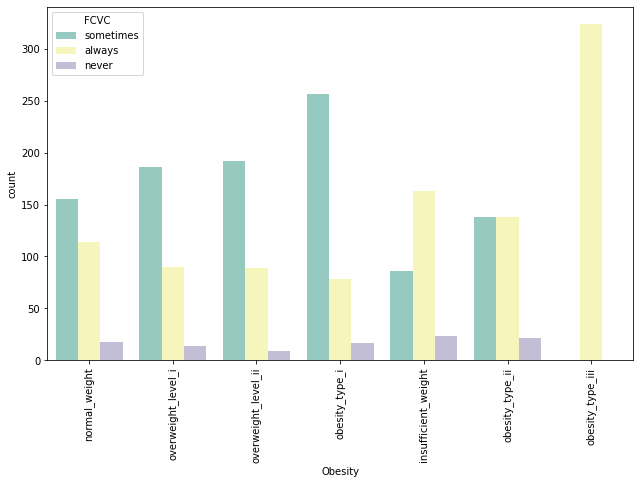

In [52]:
ax = sns.countplot(data=data, x="NObeyesdad", hue="FCVC", palette="Set3")
ax.set(xlabel = "Obesity")
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(10.5, 6.5)

채소 섭취해도 비만이다?

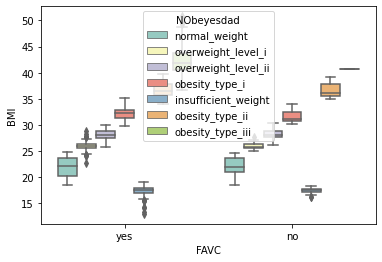

<Figure size 7200x3600 with 0 Axes>

In [65]:
sns.boxplot(x="FAVC", y="BMI", hue="NObeyesdad",data=data, palette="Set3",
                       order=["yes",'no'])
# plt.figure(figsize=(100,50))
plt.show()

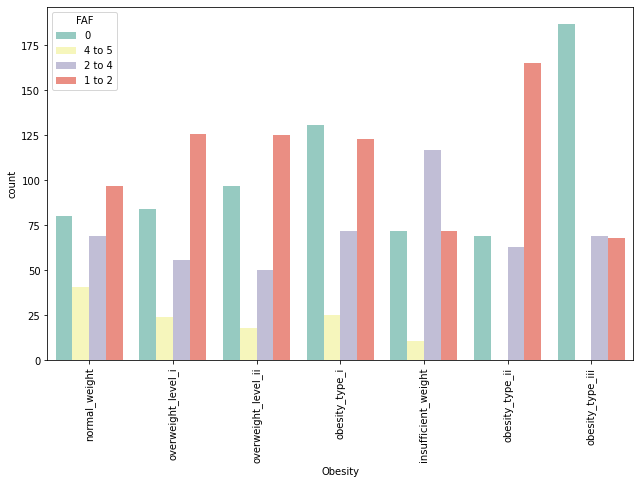

In [67]:
ax = sns.countplot(data=data, x="NObeyesdad", hue="FAF", palette="Set3")
ax.set(xlabel = "Obesity")
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(10.5, 6.5)

# 칼로리 섭취를 체크하고 있는 경우
SCC: Calories consumption monitoring - yes or no

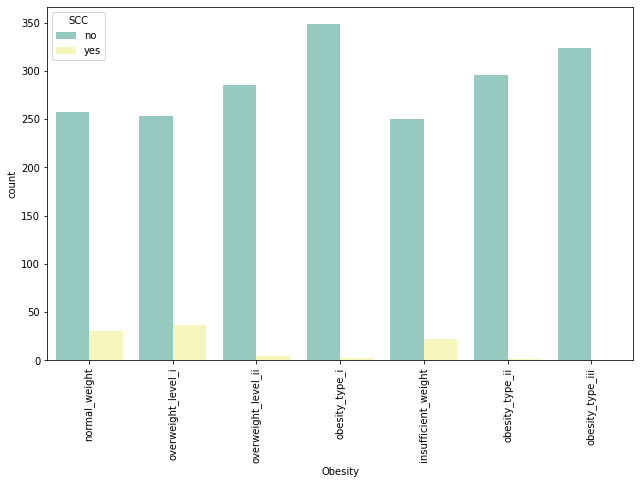

In [68]:
ax = sns.countplot(data=data, x="NObeyesdad", hue="SCC", palette="Set3")
ax.set(xlabel = "Obesity")
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(10.5, 6.5)

In [72]:
data.groupby(by = ["NObeyesdad"]).count()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
NObeyesdad,,,,,,,,,,,,,,,,,,
insufficient_weight,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272
normal_weight,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
obesity_type_i,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351
obesity_type_ii,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297
obesity_type_iii,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
overweight_level_i,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290
overweight_level_ii,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290


In [74]:
data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.620000,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.520000,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.800000,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.800000,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.780000,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,"2,107",female,21,1.710730,131,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,sometimes,public_transportation,obesity_type_iii,44.901475
2107,"2,108",female,22,1.748584,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.741923
2108,"2,109",female,23,1.752206,134,yes,yes,always,3,sometimes,no,between 1 and 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,43.543817
2109,"2,110",female,24,1.739450,133,yes,yes,always,3,sometimes,no,more than 2 l,no,1 to 2,3 to 5,sometimes,public_transportation,obesity_type_iii,44.071535


In [80]:
pd.pivot_table(data=data, values ='NObeyesdad' , index=['FAF'], columns=['FAVC'], aggfunc=np.unique)

FAVC,no,yes
FAF,,
0,"[insufficient_weight, normal_weight, obesity_t...","[insufficient_weight, normal_weight, obesity_t..."
1 to 2,"[insufficient_weight, normal_weight, obesity_t...","[insufficient_weight, normal_weight, obesity_t..."
2 to 4,"[insufficient_weight, normal_weight, obesity_t...","[insufficient_weight, normal_weight, obesity_t..."
4 to 5,"[insufficient_weight, normal_weight, obesity_t...","[insufficient_weight, normal_weight, obesity_t..."
